<a href="https://colab.research.google.com/github/AteneaCB/Python/blob/main/M4Sesi%C3%B3n2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Módulo 4**
**Sesión 2**
Introducción a la visualización de datos: Distribuciones

**Ejemplo 1**
Boxplot - Diagramas de caja

- Aprender a graficar e interpretar boxplots utilizando Seaborn
- Aprender a lidiar con valores atípicos usando IQR-Score

In [90]:
#Librerías
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [91]:
#Importar datos
df = pd.read_csv("https://raw.githubusercontent.com/beduExpert/B2-Analisis-de-Datos-con-Python-2020-Santander/main/Datasets/melbourne_housing-clean.csv", index_col=0)

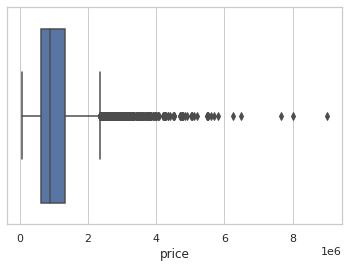

In [92]:
#Para poner un tema
#Otros estilos son: darkgrid, whitegrid, dark, white, ticks
sns.set(style="whitegrid")
#Para hacer el boxplot
sns.boxplot(x=df['price'])

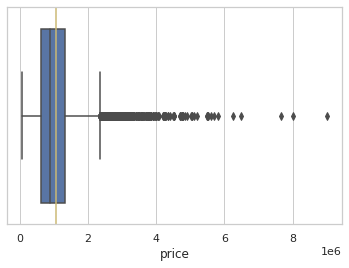

In [93]:
sns.set(style="whitegrid")
sns.boxplot(x=df['price'])
#Para agregar/editar datos en la gráfica se requiere matplotlib
#Agregar línea que represente la media
plt.axvline(df['price'].mean(), c='y')

In [94]:
#Para eliminar elementos atípicos
#Fitrar los dator por rango intercuartílico IQR-Score
iqr = df['price'].quantile(.75) - df['price'].quantile(.25)
filtro_inferior = df['price'] > df['price'].quantile(.25) - (iqr * 1.5)
filtro_superior = df['price'] < df['price'].quantile(.75) + (iqr * 1.5)

#Nuevo dataframe
df_filtrado = df[filtro_inferior & filtro_superior]
df_filtrado.describe

<bound method NDFrame.describe of              suburb  ... property_count
0        Abbotsford  ...         4019.0
1        Abbotsford  ...         4019.0
2        Abbotsford  ...         4019.0
3        Abbotsford  ...         4019.0
4        Abbotsford  ...         4019.0
...             ...  ...            ...
11640   Westmeadows  ...         2474.0
11641    Whittlesea  ...         2170.0
11642  Williamstown  ...         6380.0
11643    Yarraville  ...         6543.0
11645    Yarraville  ...         6543.0

[11126 rows x 19 columns]>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


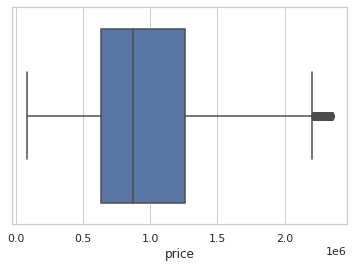

In [95]:
sns.boxplot(df_filtrado['price'])

**Reto 1**
Boxplot

- Aprender a graficar e interpretar boxplots utilizando Seaborn
- Aprender a lidiar con valores atípicos usando IQR-Score

**a) Usando boxplots para analizar la distribución de nuestros datos**

Vamos a hacer algunas gráficas de boxplot y describirlas en equipo. Usa Seaborn para generar gráficas boxplot de los siguientes datasets y columnas:

1. Dataset: 'near_earth_objects-jan_feb_1995-clean.csv'
Columnas a graficar: 'estimated_diameter.meters.estimated_diameter_max' y 'relative_velocity.kilometers_per_second'
1. Dataset: 'new_york_times_bestsellers-clean.json'
Columnas a graficar: 'price.numberDouble'
1. Dataset: 'melbourne_housing-clean.csv'
Columnas a graficar: 'land_size'

In [96]:
#Dataset 2 Bestsellers
#Cargar Json
import json
import requests
data = requests.get('https://raw.githubusercontent.com/beduExpert/B2-Analisis-de-Datos-con-Python-2020-Santander/main/Datasets/new_york_times_bestsellers-clean.json')
json_data = json.loads(data.content)

df_json = pd.DataFrame.from_dict(json_data)
df_json.head()

,amazon_product_url,author,description,publisher,title,oid,bestsellers_date.numberLong,published_date.numberLong,rank.numberInt,rank_last_week.numberInt,weeks_on_list.numberInt,price.numberDouble
0,http://www.amazon.com/The-Host-Novel-Stephenie...,Stephenie Meyer,Aliens have taken control of the minds and bod...,"Little, Brown",THE HOST,5b4aa4ead3089013507db18c,1211587200000,1212883200000,2,1,3,25.99
1,http://www.amazon.com/Love-Youre-With-Emily-Gi...,Emily Giffin,A woman's happy marriage is shaken when she en...,St. Martin's,LOVE THE ONE YOU'RE WITH,5b4aa4ead3089013507db18d,1211587200000,1212883200000,3,2,2,24.95
2,http://www.amazon.com/The-Front-Garano-Patrici...,Patricia Cornwell,A Massachusetts state investigator and his tea...,Putnam,THE FRONT,5b4aa4ead3089013507db18e,1211587200000,1212883200000,4,0,1,22.95
3,http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...,Chuck Palahniuk,An aging porn queens aims to cap her career by...,Doubleday,SNUFF,5b4aa4ead3089013507db18f,1211587200000,1212883200000,5,0,1,24.95
4,http://www.amazon.com/Sundays-at-Tiffanys-Jame...,James Patterson and Gabrielle Charbonnet,A woman finds an unexpected love,"Little, Brown",SUNDAYS AT TIFFANY’S,5b4aa4ead3089013507db190,1211587200000,1212883200000,6,3,4,24.99


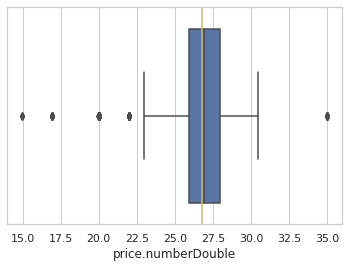

In [97]:
#Boxplot
sns.set(style="whitegrid")
sns.boxplot(x=df_json['price.numberDouble'])
#Para agregar/editar datos en la gráfica se requiere matplotlib
#Agregar línea que represente la media
plt.axvline(df_json['price.numberDouble'].mean(), c='y')

**b) Eliminando valores atípicos**

A partir de las visualizaciones que realizaste en el punto anterior, decide en cuáles columnas tenemos valores atípicos que pueden estorbarnos en nuestro análisis. 

- Elimina dichos valores atípicos usando el Score de Rango Intercuartílico. Puedes probar variando un poco la medida del Score (1.5 * IQR) para eliminar solamente los valores que tú consideras como extremos.

- Para observar los cambios a detalle, obtén la mediana, la media y la desviación estándar de tus datos antes y después de eliminar los valores atípicos. Compara estos valores y explica qué es lo que está pasando.

- Grafica de nuevo tus datos sin valores atípicos para compararlos con las gráficas anteriores.

- Comenta con la experta y tus compañeros tus hallazgos.

In [98]:
#Para eliminar elementos atípicos
#Fitrar los dator por rango intercuartílico IQR-Score
iqr = df_json['price.numberDouble'].quantile(.75) - df_json['price.numberDouble'].quantile(.25)
filtro_json_inf = df_json['price.numberDouble'] > df_json['price.numberDouble'].quantile(.25) - (iqr * 1.5)
filtro_json_sup = df_json['price.numberDouble'] < df_json['price.numberDouble'].quantile(.75) + (iqr * 1.5)

#Nuevo dataframe
df_json_filtrado = df_json[filtro_json_inf & filtro_json_sup]
df_json_filtrado.describe

<bound method NDFrame.describe of                                      amazon_product_url  ... price.numberDouble
0     http://www.amazon.com/The-Host-Novel-Stephenie...  ...              25.99
1     http://www.amazon.com/Love-Youre-With-Emily-Gi...  ...              24.95
2     http://www.amazon.com/The-Front-Garano-Patrici...  ...              22.95
3     http://www.amazon.com/Snuff-Chuck-Palahniuk/dp...  ...              24.95
4     http://www.amazon.com/Sundays-at-Tiffanys-Jame...  ...              24.99
...                                                 ...  ...                ...
3028  http://www.amazon.com/Six-Years-Harlan-Coben/d...  ...              27.95
3029  http://www.amazon.com/The-Interestings-Novel-M...  ...              27.95
3030  http://www.amazon.com/Man-Without-Breath-Berni...  ...              26.95
3031  http://www.amazon.com/The-Storyteller-Jodi-Pic...  ...              28.99
3032  http://www.amazon.com/Z-A-Novel-Zelda-Fitzgera...  ...              25.99

[2950

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


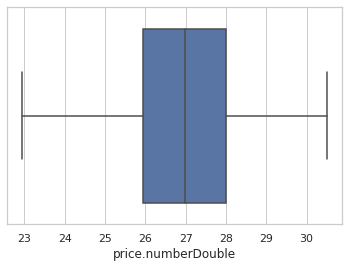

In [99]:
#Segundo Boxplot
sns.boxplot(df_json_filtrado['price.numberDouble'])

In [100]:
print(f'')

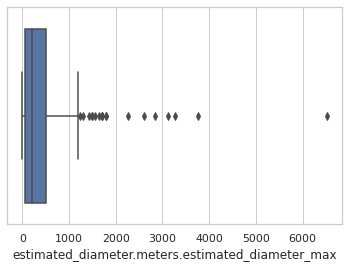

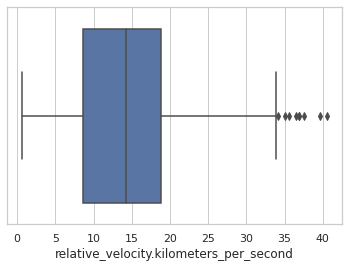

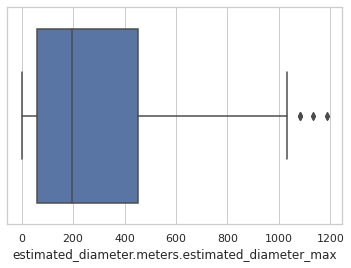

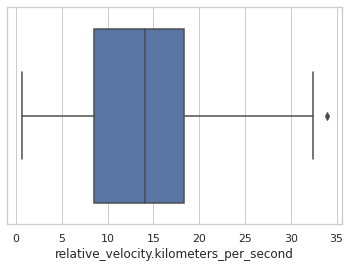

In [101]:
#Dataset 1 Objetos cercanos a la tierra
# Primer dataser
neo = pd.read_csv('https://raw.githubusercontent.com/beduExpert/B2-Analisis-de-Datos-con-Python-2020-Santander/main/Datasets/near_earth_objects-jan_feb_1995-clean.csv', index_col = 0)

# datos 1
sns.set(style='whitegrid')
sns.boxplot(x=neo['estimated_diameter.meters.estimated_diameter_max'])
plt.show()

# datos 2
sns.set(style='whitegrid')
sns.boxplot(x=neo['relative_velocity.kilometers_per_second'])
plt.show()

# Filtrado de outilers con IQR-score

# datos 1
iqr = neo['estimated_diameter.meters.estimated_diameter_max'].quantile(0.75) - neo['estimated_diameter.meters.estimated_diameter_max'].quantile(0.25)
filtro_inferior = neo['estimated_diameter.meters.estimated_diameter_max'] > neo['estimated_diameter.meters.estimated_diameter_max'].quantile(0.25) - (iqr * 1.5)
filtro_superior = neo['estimated_diameter.meters.estimated_diameter_max'] < neo['estimated_diameter.meters.estimated_diameter_max'].quantile(0.75) + (iqr * 1.5)
neo_filtrado = neo[filtro_inferior & filtro_superior]

sns.set(style='whitegrid')
sns.boxplot(x=neo_filtrado['estimated_diameter.meters.estimated_diameter_max'])
plt.show()

# datos 1
iqr = neo['relative_velocity.kilometers_per_second'].quantile(0.75) - neo['relative_velocity.kilometers_per_second'].quantile(0.25)
filtro_inferior = neo['relative_velocity.kilometers_per_second'] > neo['relative_velocity.kilometers_per_second'].quantile(0.25) - (iqr * 1.5)
filtro_superior = neo['relative_velocity.kilometers_per_second'] < neo['relative_velocity.kilometers_per_second'].quantile(0.75) + (iqr * 1.5)

neo_filtrado = neo[filtro_inferior & filtro_superior]

sns.set(style='whitegrid')
sns.boxplot(x=neo_filtrado['relative_velocity.kilometers_per_second'])
plt.show()


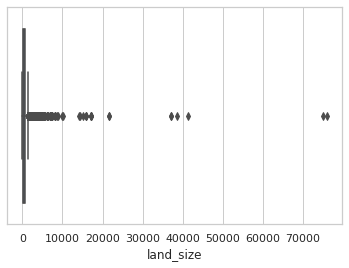

0.0
1396.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


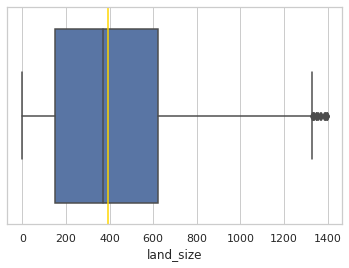

In [102]:
#Dataset 3
melbourne = pd.read_csv("https://raw.githubusercontent.com/beduExpert/B2-Analisis-de-Datos-con-Python-2020-Santander/main/Datasets/melbourne_housing-clean.csv", index_col=0)

data = melbourne['land_size']

sns.set(style = "whitegrid")
sns.boxplot(x = melbourne['land_size'])

plt.show()

#filtramos datos atípicos con IQR_score
iqr = data.quantile(0.75) - data.quantile(0.25)
filtro_data_inferior = data > data.quantile(0.25) - iqr*1.5
filtro_data_superior =  data < data.quantile(0.75) + iqr*1.5

df_data_filtrado = melbourne[filtro_data_inferior & filtro_data_superior]

df_data_filtrado

print(df_data_filtrado['land_size'].min())
print(df_data_filtrado['land_size'].max())

sns.boxplot(df_data_filtrado['land_size'])
plt.axvline(df_data_filtrado['land_size'].mean(), c='gold')

plt.show()


**Ejemplo 2**
Tablas de frecuencias

- Aprender a generar una tabla de frecuencias usando pd.cut

In [103]:
#Tablas de frecuencias
#Diferencia entre elemento máximo y mínimo
prices = df['price']
prices.max() - prices.min()

8915000.0

In [104]:
#Para cortar elementos discretos en grupos
pd.cut(prices, 20)
#Da como resultado los segmentos como series

0        (1422250.0, 1868000.0]
1         (976500.0, 1422250.0]
2        (1422250.0, 1868000.0]
3          (530750.0, 976500.0]
4        (1422250.0, 1868000.0]
                  ...          
11641      (530750.0, 976500.0]
11642     (976500.0, 1422250.0]
11643      (530750.0, 976500.0]
11644    (2313750.0, 2759500.0]
11645      (530750.0, 976500.0]
Name: price, Length: 11646, dtype: category
Categories (20, interval[float64]): [(76085.0, 530750.0] < (530750.0, 976500.0] < (976500.0, 1422250.0] <
                                     (1422250.0, 1868000.0] ... (7217000.0, 7662750.0] <
                                     (7662750.0, 8108500.0] < (8108500.0, 8554250.0] <
                                     (8554250.0, 9000000.0]]

In [105]:
#Guardamos la información de los segmentos
segmentos = pd.cut(prices, 20)

In [106]:
df['price'].groupby(segmentos).count()

price
(76085.0, 530750.0]       1747
(530750.0, 976500.0]      4835
(976500.0, 1422250.0]     2664
(1422250.0, 1868000.0]    1278
(1868000.0, 2313750.0]     570
(2313750.0, 2759500.0]     261
(2759500.0, 3205250.0]     141
(3205250.0, 3651000.0]      67
(3651000.0, 4096750.0]      40
(4096750.0, 4542500.0]      16
(4542500.0, 4988250.0]      10
(4988250.0, 5434000.0]       5
(5434000.0, 5879750.0]       7
(5879750.0, 6325500.0]       1
(6325500.0, 6771250.0]       1
(6771250.0, 7217000.0]       0
(7217000.0, 7662750.0]       1
(7662750.0, 8108500.0]       1
(8108500.0, 8554250.0]       0
(8554250.0, 9000000.0]       1
Name: price, dtype: int64

In [107]:
#Con bins = lista de los rangos que queremos donde corte
pd.cut(prices, bins=[500000, 1000000, 2000000, 3000000, 9000000])

0        (1000000, 2000000]
1        (1000000, 2000000]
2        (1000000, 2000000]
3         (500000, 1000000]
4        (1000000, 2000000]
                ...        
11641     (500000, 1000000]
11642    (1000000, 2000000]
11643     (500000, 1000000]
11644    (2000000, 3000000]
11645     (500000, 1000000]
Name: price, Length: 11646, dtype: category
Categories (4, interval[int64]): [(500000, 1000000] < (1000000, 2000000] < (2000000, 3000000] <
                                  (3000000, 9000000]]

In [108]:
#Agregar columna segmento al dataframe
df['segmento'] = pd.cut(prices, 20)
df.head(3)

,suburb,address,rooms,type,price,method,seller_g,date,distance,postcode,bedroom_2,bathroom,car,land_size,council_area,latitude,longitude,region_name,property_count,segmento
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,"(1422250.0, 1868000.0]"
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,"(976500.0, 1422250.0]"
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,"(1422250.0, 1868000.0]"


**Reto 2**
Tablas de frecuencias

- Aprender a generar tablas de frecuencias segmentando nuestros datos

**a) Analizando distribución con tablas de frecuencias**

Vamos a generar tablas de frecuencias de los siguientes datasets y columnas:

1. Dataset: 'near_earth_objects-jan_feb_1995-clean.csv'
Columnas a graficar: 'estimated_diameter.meters.estimated_diameter_max' y 'relative_velocity.kilometers_per_second'
2. Dataset: 'new_york_times_bestsellers-clean.json'
Columnas a graficar: 'price.numberDouble'
3. Dataset: 'melbourne_housing-clean.csv'
Columnas a graficar: 'land_size'

In [109]:
#Diferencia entre elemento máximo y mínimo
#Dataset 1
diameter = neo['estimated_diameter.meters.estimated_diameter_max']
diameter.max() - diameter.min()

6513.905031051

In [110]:
#Calcular por el método Sturges
#Para obtener N
diameter.count()

333

In [111]:
#Calculate natural logarithm
import numpy as np
natural_log = np.log(333)*3.322 + 1
print(natural_log)

20.294649351715034


In [112]:
#Para cortar elementos discretos en grupos
segment = pd.cut(diameter, 20)

In [113]:
neo['estimated_diameter.meters.estimated_diameter_max'].groupby(segment).count()

estimated_diameter.meters.estimated_diameter_max
(-3.535, 328.674]       207
(328.674, 654.369]       67
(654.369, 980.065]       24
(980.065, 1305.76]       18
(1305.76, 1631.455]       4
(1631.455, 1957.15]       6
(1957.15, 2282.846]       1
(2282.846, 2608.541]      1
(2608.541, 2934.236]      1
(2934.236, 3259.931]      1
(3259.931, 3585.627]      1
(3585.627, 3911.322]      1
(3911.322, 4237.017]      0
(4237.017, 4562.712]      0
(4562.712, 4888.408]      0
(4888.408, 5214.103]      0
(5214.103, 5539.798]      0
(5539.798, 5865.493]      0
(5865.493, 6191.189]      0
(6191.189, 6516.884]      1
Name: estimated_diameter.meters.estimated_diameter_max, dtype: int64

In [114]:
#Dataset 2
bookprice = df_json['price.numberDouble']
bookprice.max() - bookprice.min()

20.0

**Ejemplo 3**
Histogramas

- El eje x es el rango de nuestros datos y se divide por segmentos (como los que generamos en el Ejemplo pasado).
- El eje y indica el conteo de muestras en cada segmento.


**Ejemplo 4**
Describiendo histogramas

- Aprender algunos términos importantes para describir nuestros histogramas

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


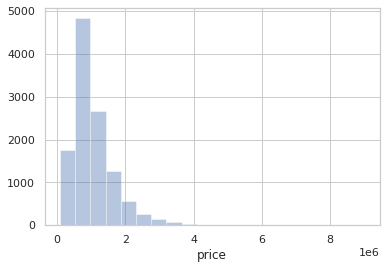

In [115]:
#Histograma en seaborn con kernel
sns.distplot(df['price'], kde=False, norm_hist=False, bins=20)

In [116]:
#Asimetría skewness
#Dispersión kurtosis
from scipy.stats import skew, kurtosis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


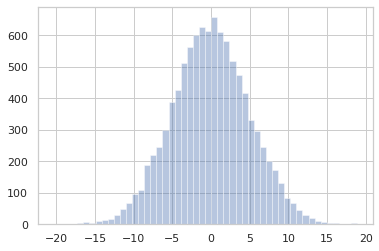

In [117]:
#Distribución normal
normal = np.random.normal(loc=0, scale=5, size=10000)
sns.distplot(normal, kde=False, norm_hist=False)

In [118]:
print(f'Curtosis: {kurtosis(normal)}')
print(f'Asimetría: {skew(normal)}')

Curtosis: 0.048670655699944554
Asimetría: -0.00476747965568236


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


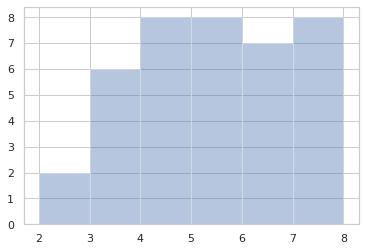

In [119]:
#Distribución de cola corta
cola_corta = np.array([2, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8])
sns.distplot(cola_corta, kde=False, norm_hist=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


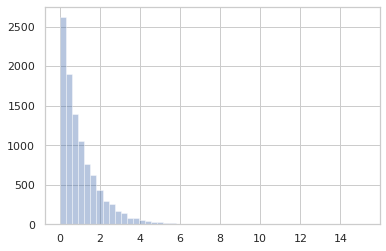

In [120]:
#Asimetría postiva
asimetria_positiva = np.random.exponential(scale=1.0, size=10000)
sns.distplot(asimetria_positiva, kde=False, norm_hist=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


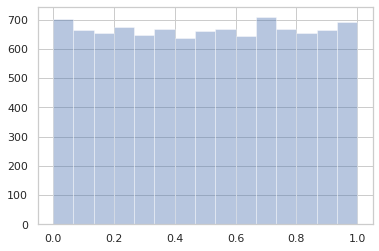

In [121]:
#Districubión uniforme
uniform = np.random.uniform(size=10000)
sns.distplot(uniform, bins=15, kde=False, norm_hist=False)

**Reto 3**
Describiendo histogramas

- Generar histogramas y caracterizarlos utilizando las herramientas que hemos aprendido hasta el momento

**a) Pima Indians Diabetes Database**

Estado de salud de mujeres mayores de 21 años de ascendencia pima: diabetes-clean.csv.

- Columna 'outcome' que indica si las pacientes fueron diagnosticadas con diabetes o no.
- Todas las variables independientes en este dataset son numéricas. 

1. Genera histogramas de todas las variables independientes para observar la distribución de estas variables. Un valor aceptable para el número de bins es 50. Después de generar el histograma, caracterízalo con una descripción utilizando los términos que has aprendido en esta sesión.
2. Intenta también discernir a simple vista la asimetría y curtosis de tus histogramas, y después confirma tus hipótesis utilizando las funciones kurtosis y skew del módulo scipy.stats.
3. Ve si te es posible identificar la cantidad y magnitud de los valores atípicos usando histogramas. ¿Cuál ha sido la técnica que te ha facilitado más la identificación de valores atípicos? ¿Boxplots, tablas de frecuencias o histogramas?

In [122]:
#Cargar datos: diabetes-clean.csv
diabetes = pd.read_csv("https://raw.githubusercontent.com/beduExpert/B2-Analisis-de-Datos-con-Python-2020-Santander/main/Datasets/diabetes-clean.csv", index_col=0)
diabetes.head()

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [123]:
diabetes.dtypes

pregnancies                     int64
glucose                         int64
blood_pressure                  int64
skin_thickness                  int64
insulin                         int64
bmi                           float64
diabetes_pedigree_function    float64
age                             int64
outcome                         int64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


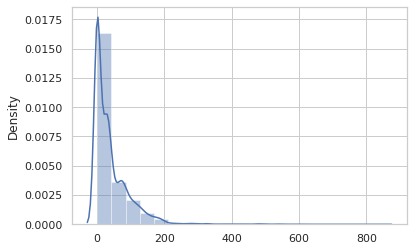

In [124]:
sns.distplot(diabetes, bins=20, kde=True, norm_hist=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


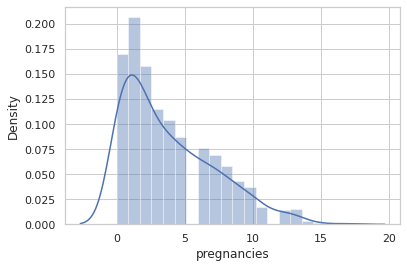

In [125]:
#Embarazos
sns.distplot(diabetes['pregnancies'], bins=20, kde=True, norm_hist=False)
#Asimétrica positiva

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


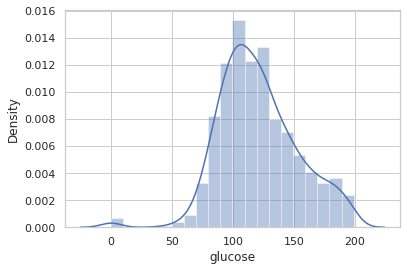

In [126]:
#Glucosa
sns.distplot(diabetes['glucose'], bins=20, kde=True, norm_hist=False)
#Asimétrica negativa

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


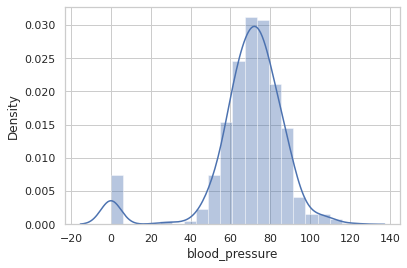

In [127]:
#Presión
sns.distplot(diabetes['blood_pressure'], bins=20, kde=True, norm_hist=False)
#Aparentemente norma, falta revisar curtosis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


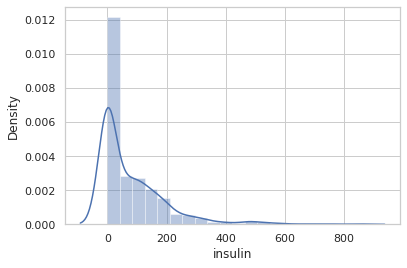

In [131]:
#Insulina
sns.distplot(diabetes['insulin'], bins=20, kde=True, norm_hist=False)
#Asimétrica positiva

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


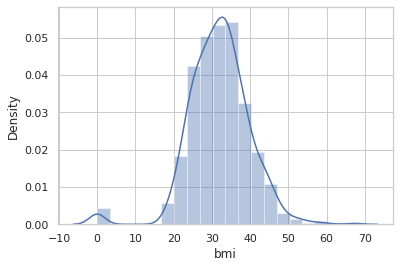

In [132]:
#Índice de masa corporal
sns.distplot(diabetes['bmi'], bins=20, kde=True, norm_hist=False)
#Aparentemente normal

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


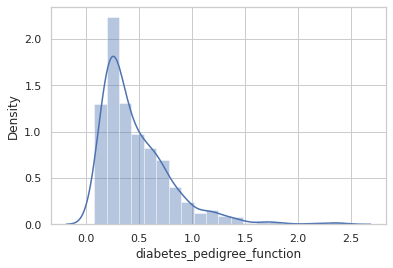

In [133]:
#Diabetes
sns.distplot(diabetes['diabetes_pedigree_function'], bins=20, kde=True, norm_hist=False)
#Asimétrica positiva

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


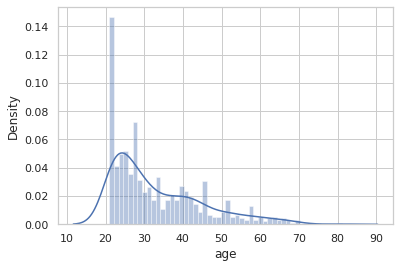

In [129]:
#Edades
sns.distplot(diabetes['age'], bins=50, kde=True, norm_hist=False)
#Asimería positiva

In [130]:
print('DataSet Diabetes, Edades')
print(f'Curtosis: {kurtosis(diabetes)}')
print(f'Asimetría: {skew(diabetes)}')

DataSet Diabetes, Edades
Curtosis: [ 0.15038274  0.62881333  5.13869066 -0.52449449  7.15957492  3.26125742
  5.55079205  0.63117694 -1.59832836]
Asimetría: [ 0.89991194  0.17341396 -1.84000523  0.10915876  2.26781046 -0.42814328
  1.9161592   1.12738926  0.6337757 ]


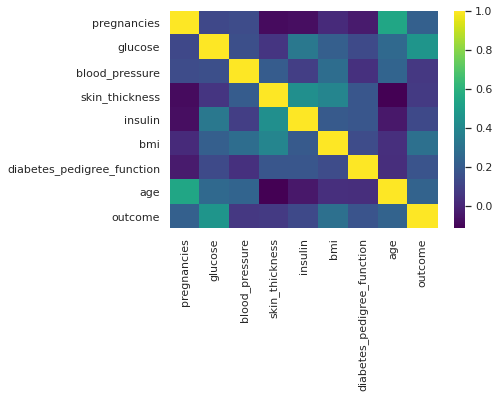

In [135]:
sns.heatmap(diabetes.corr(), cmap='viridis')

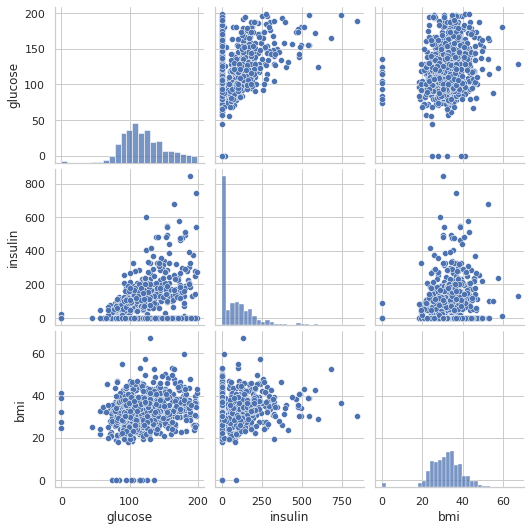

In [138]:
sns.pairplot(diabetes[['glucose', 'insulin', 'bmi']])

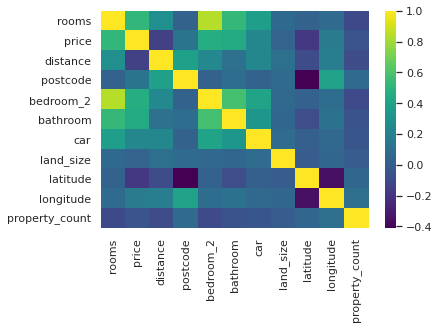

In [134]:
#Con dataset de precios de casas
sns.heatmap(df.corr(), cmap='viridis')

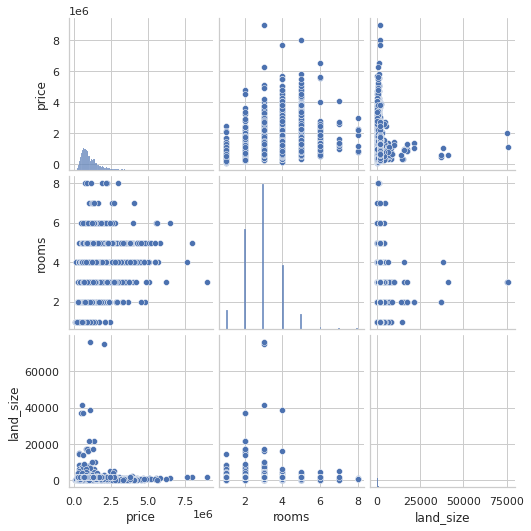

In [140]:
sns.pairplot(df[['price', 'rooms', 'land_size']])

**Ejemplo 5**
Gráficas de densidad

- Aprender a generar gráficas de densidad usando Seaborn.
- Aprender a usar gráficas de densidad para comparar distribuciones de datos.

In [141]:
import numpy as np
import seaborn as sns

sns.set(style='whitegrid')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


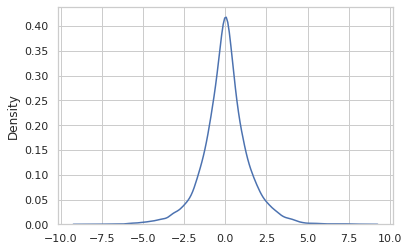

In [142]:
#Distribución de Laplace
laplace = np.random.laplace(loc=0.0, scale=1, size=10000)
sns.distplot(laplace, hist=False);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


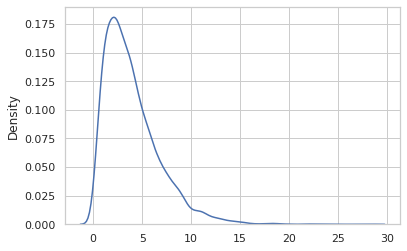

In [143]:
#Distribución xi cuadrada
chisquare = np.random.chisquare(4, size=10000)
sns.distplot(chisquare, hist=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

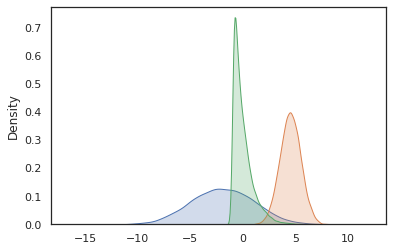

In [144]:
#graficar varias distribuciones en la misma gráfica
sns.set(style='white')

normal_1 = np.random.normal(loc=-2, scale=3, size=10000)
normal_2 = np.random.normal(loc=4.5, scale=1, size=10000)
exponential = np.random.exponential(scale=1.0, size=10000) - 1

sns.distplot(normal_1, hist = False, kde_kws = {'shade': True})
sns.distplot(normal_2, hist = False, kde_kws = {'shade': True})
sns.distplot(exponential, hist = False, kde_kws = {'shade': True})

**Reto 4**
Gráficas de densidad

- Utilizar gráficas de densidad para realizar comparaciones entre conjuntos de datos.

**a) Comparando histogramas de diferentes categorías**

Dataset: athlete_olympic_events-clean.csv. Este dataset contiene datos sobre participaciones de atletas en las Olimpiadas.
Objetivo: comparar las edades, alturas y pesos de hombres y mujeres atletas usando gráficas de densidad. Para lograr esto, realiza los siguientes pasos:

1. Agrupar nuestros datos para que sólo haya una sola entrada por atleta utilizando el index.
  - Agrupa tus datos usando el índice (esto se puede lograr con el método groupby(level=0), indexa solamente las columnas 'age', 'height' y 'weight' y aplica la función mean. Esto nos va a dar un DataFrame con el promedio de edad, peso y altura de cada atleta a través de todas sus participaciones en Olimpiadas.
  - Agregar la columna 'sex' para poder separar nuestros datos en categorías (no pudimos pedirla también en el paso anterior por que no es posible sacar un promedio de las letras 'M' y 'F'). Extrae tu columna 'sex' y realiza de nuevo una agrupación por índice aplicando la agregación 'last'. Esto te dará una Serie de la columna 'sex' agrupada por atleta.
  - Ahora, usando el método pd.merge agrega la información de 'sex' a la agrupación de promedios que realizamos anteriormente.
  - Listo ahora tenemos un DataFrame con nuestra columnas 'sex', 'age', 'height' y 'weight' donde los atletas no se repiten.
1. Ahora usa filtros para separar tus datos en atletas hombre y mujeres.
1. Finalmente usa gráficas de densidad para graficar las columnas 'age', 'height' y 'weight' (cada una en una gráfica distinta) y comparar las distribuciones de ambos sexos en diferentes variables. Por ejemplo, en una gráfica tendrás la distribución de las edades de los atletas hombres al lado de la distribución de las edades de las atletas mujeres.

In [145]:
#Dataset
olympic = pd.read_csv("https://raw.githubusercontent.com/beduExpert/B2-Analisis-de-Datos-con-Python-2020-Santander/main/Datasets/athlete_olympic_events-clean.csv", index_col=0)
olympic.head()

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal
athlete_id,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",None
5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,None
